## Section 1: Data Preprocessing

Kaggle Dataset Link: [Restaurant Reviews](https://www.kaggle.com/datasets/akram24/restaurant-reviews/code)

### Import and load the datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter = '\t', quoting =3)

### Data Exploration

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
df.select_dtypes(include = 'object').columns

Index(['Review'], dtype='object')

In [10]:
df.select_dtypes(include = ['int64','float64']).columns

Index(['Liked'], dtype='object')

### Dealing with missing values

In [11]:
df.isna().values.any()

False

In [12]:
df.isna().values.sum()

0

### Countplot

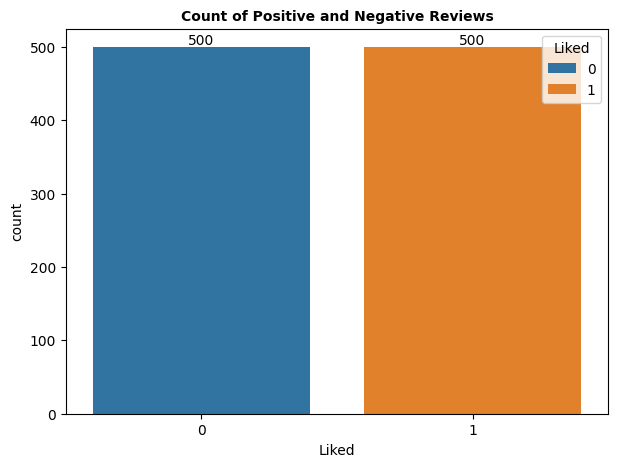

In [13]:
#Countplot of Restaurant Reviews Column
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "Liked", data = df, hue = "Liked")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Count of Positive and Negative Reviews", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

In [14]:
countreview = df['Liked'].value_counts().sort_values(ascending = True)
countreview

1    500
0    500
Name: Liked, dtype: int64

### Length of messages

In [15]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [16]:
df['Length'] = df['Review'].apply(len)

In [17]:
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


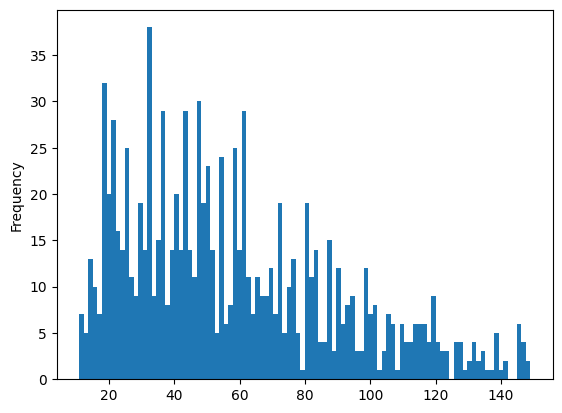

In [18]:
#Histogram
df['Length'].plot( bins = 100, kind = 'hist')
plt.show()

In [19]:
#No of characters in the message
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [20]:
#Longest message
df[df['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [21]:
#Shortest message
df[df['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

In [22]:
positive = df[df['Liked'] == 1]

In [23]:
negative = df[df['Liked'] == 0]

In [24]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [25]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


### Cleaning the text

In [26]:
corpus =[]
#czof 1000 reviews
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #single row for loop
  review = ' '.join(review)
  corpus.append(review)

print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [27]:
len(corpus)

1000

### Cleaning Bag of Words Model

In [28]:
cv = CountVectorizer(max_features = 1500)

In [29]:
x = cv.fit_transform(corpus).toarray()

In [30]:
y= df.iloc[:,1]

In [31]:
x.shape

(1000, 1500)

In [32]:
y.shape

(1000,)

### Splitting the dataset into train and test sets

In [33]:
df.columns

Index(['Review', 'Liked', 'Length'], dtype='object')

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
x_train.shape

(800, 1500)

In [36]:
x_test.shape

(200, 1500)

In [37]:
y_train.shape

(800,)

In [38]:
y_test.shape

(200,)

## Section 2: Building the Model

### 1) Naive Bayes Model

In [39]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [40]:
y_pred = classifier_nb.predict(x_test)

In [41]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

66.0


In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[49, 56],
       [12, 83]])

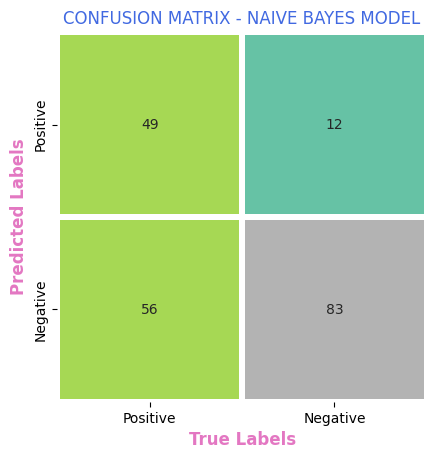

In [43]:
sns.heatmap( confusion_matrix(y_pred,y_test), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True)
plt.title('CONFUSION MATRIX - NAIVE BAYES MODEL', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

### 2)XGBoost Classifier

In [44]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred = classifier_xgb.predict(x_test)

In [46]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

73.5


In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[84, 21],
       [32, 63]])

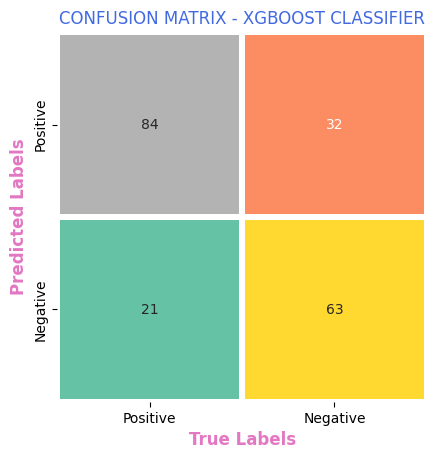

In [48]:
sns.heatmap( confusion_matrix(y_pred,y_test), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True)
plt.title('CONFUSION MATRIX - XGBOOST CLASSIFIER', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

## Section 3: Final Model (XGBoost Classifier)

In [49]:
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = classifier.predict(x_test)

In [51]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

73.5


In [52]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[84, 21],
       [32, 63]])

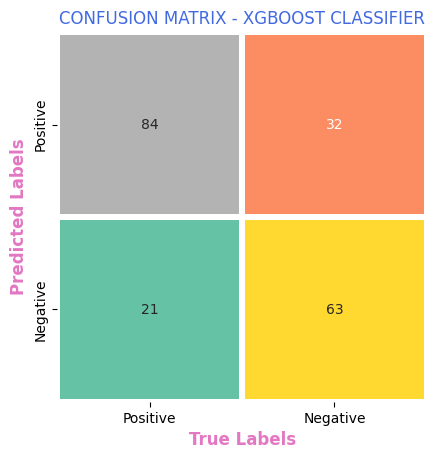

In [53]:
sns.heatmap( confusion_matrix(y_pred,y_test), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True)
plt.title('CONFUSION MATRIX - XGBOOST CLASSIFIER', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()